# Mobile Game: A/B Testing
## Analyze an A/B test from the popular mobile puzzle game, Cookie Cats
- from https://www.kaggle.com/yufengsui/mobile-games-ab-testing

# ABSTRACT
---------------------

## Data
* **userid** - A unique number that identifies each player
* **version** - Whether the player was put in the control group (gate_30 - gate_40)
* **sum_gamerounds** - The number of game rounds played by the player during the first 14 days after install
* **retention_1** - Did the player come back and play 1 day after installing?
* **retention_7** - Did the player come back and play 7 day after installing?

## Task
- At what stage should the 'Lock' be placed for better retention?
- We compared two different groups: gate_30 and gate_40
- We have 1-day and 7-day retention

# METHOD
-----------------
## 1. EDA

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Data/cookie_cats.csv')

print(df.shape)
df.tail()

(90189, 5)


,userid,version,sum_gamerounds,retention_1,retention_7
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False
90188,9999861,gate_40,16,False,False


In [2]:
# To check any missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


* looks like there is no missing value

In [3]:
# how many users are there in each version
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


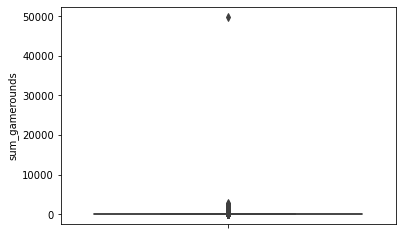

In [4]:
sns.boxplot(data=df, y='sum_gamerounds')

* looks like there are outliers
    * there is no way that a player can play over 50000 in 14 days

In [5]:
# remove any users who played over 10000
df = df[df['sum_gamerounds'] < 10000]
print(df.shape)
df.tail()

(90188, 5)


,userid,version,sum_gamerounds,retention_1,retention_7
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False
90188,9999861,gate_40,16,False,False


In [6]:
# check percentile for 'sum_gamerounds'
df['sum_gamerounds'].describe()

count    90188.000000
mean        51.320253
std        102.682719
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max       2961.000000
Name: sum_gamerounds, dtype: float64

* 50% users played over 16 rounds

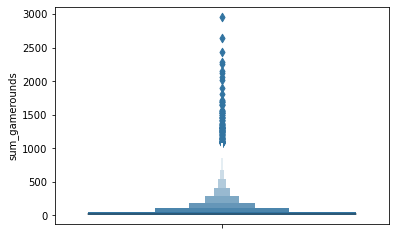

In [7]:
sns.boxenplot(data=df, y='sum_gamerounds')

## 2. Data analysis

Text(0.5, 0, '# Game rounds')

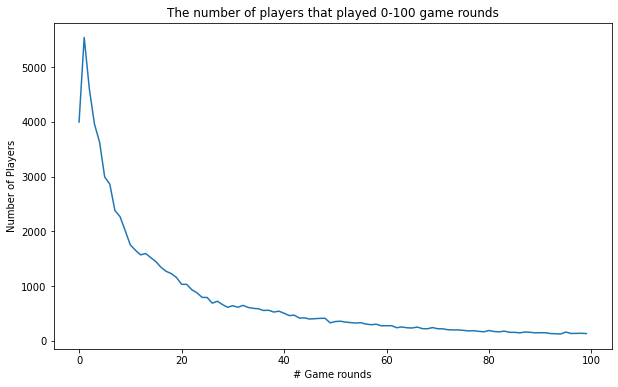

In [8]:
plot_df = df.groupby('sum_gamerounds')['userid'].count()

%matplotlib inline

ax = plot_df[:100].plot(figsize=(10,6))
ax.set_title("The number of players that played 0-100 game rounds")
ax.set_ylabel("Number of Players")
ax.set_xlabel('# Game rounds')

* About 4000 users never played the game
* 1-day retention is a crucial data in game industry
    * There are significant number of players who liked the game
* The number of users decreases as the level progress

In [9]:
# 1-day retention mean
df['retention_1'].mean()

0.4452144409455803

* About 44 percent of users played the game next day after downloads

In [10]:
# by different version
df.groupby('version')['retention_1'].mean()

version
gate_30    0.448198
gate_40    0.442283
Name: retention_1, dtype: float64

* gate_30 retention rate is higher than gate_40 by 0.6 percent

In [11]:
# 7-day retention mean
df['retention_7'].mean()

0.1860557945624695

In [12]:
# by different version
df.groupby('version')['retention_7'].mean()

version
gate_30    0.190183
gate_40    0.182000
Name: retention_7, dtype: float64

* gate_30 is higher than gate_40 by about 0.8 percent

## 3. Bootstrapping
* to find if there is significant difference between **gate_30 and gate_40 retentions**

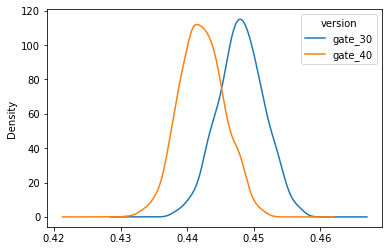

In [19]:
boot_1d = []
# get 50% sample from the pop for 1-day retention each time
for i in range(1000):
    boot_mean = df.sample(frac = 0.5,replace = True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)

boot_1d = pd.DataFrame(boot_1d)

boot_1d.plot(kind='density')

* Gate_30 is about 0.448 and gate_40 is about 0.442
* There is difference but it does not look significant

Probablity that gate_30 has higher 1-day retention: 0.903


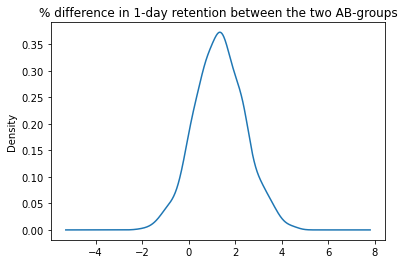

In [21]:
# difference between AB group
boot_1d['diff'] = (boot_1d.gate_30 - boot_1d.gate_40)/boot_1d.gate_40*100

ax = boot_1d['diff'].plot(kind='density')
ax.set_title('% difference in 1-day retention between the two AB-groups')

print('Probablity that gate_30 has higher 1-day retention:',(boot_1d['diff'] > 0).mean())

* The user preferred gate_30 for 95% of the time and the max percentage difference is about 1.5%
     * 1-day retention is higher for gate_30

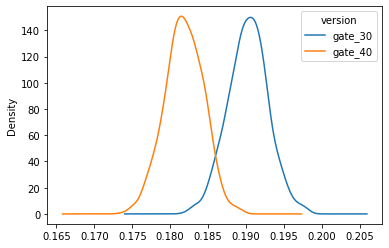

In [27]:
boot_7d = []
# get 50% sample from the pop for 7-day retention each time
for i in range(1000):
    boot_mean = df.sample(frac = 0.5,replace = True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)

boot_7d = pd.DataFrame(boot_7d)

boot_7d.plot(kind='density')

* Gate_30 is about 0.192 and gate_40 is about 0.182
* There is difference but it does not look significant

Probablity that gate_30 has higher 7-day retention: 0.988


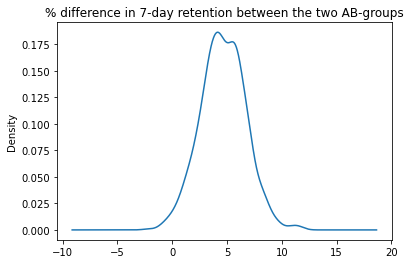

In [28]:
# difference between AB group
boot_7d['diff'] = (boot_7d.gate_30 - boot_7d.gate_40)/boot_7d.gate_40*100

ax = boot_7d['diff'].plot(kind='density')
ax.set_title('% difference in 7-day retention between the two AB-groups')

print('Probablity that gate_30 has higher 7-day retention:',(boot_7d['diff'] > 0).mean())

* This shows that gate_30 has higher 7-day retention 98.8% of the time.

## 4. 2 Sample T-Test

- Null hypothesis : gate_30 mean and gate_40 mean are the same
- Alt hypothesis : Means are not equal

In [31]:
from scipy import stats

df_30 = df[df['version'] == 'gate_30']
df_40 = df[df['version'] == 'gate_40']
tTestResult_1d = stats.ttest_ind(df_30['retention_1'], df_40['retention_1'])
tTestResult_7d = stats.ttest_ind(df_30['retention_7'], df_40['retention_1'])

In [32]:
print(tTestResult_1d)
print(tTestResult_7d)

Ttest_indResult(statistic=1.7871153372992439, pvalue=0.07392220630182521)
Ttest_indResult(statistic=-84.48321935747556, pvalue=0.0)


* 1-day retention
    * With our decision of a 5% risk, we **failed to reject** the null hypothesis
* 7-day retention
    * With our decision of a 5% risk, we **reject** the null hypothesis. Therefore, for 7-day retention, users from gate_30 played the game longer (better retention)

## 5. Chi-square test

In [41]:
print(df.groupby('version').sum(), '\n')
print(df.groupby('version').count())

               userid  sum_gamerounds  retention_1  retention_7
version                                                        
gate_30  222937707836         2294941        20034         8501
gate_40  227857702576         2333530        20119         8279 

         userid  sum_gamerounds  retention_1  retention_7
version                                                  
gate_30   44699           44699        44699        44699
gate_40   45489           45489        45489        45489


* Null hypothesis : There is no relationship between gate_30 and gate_40 1-day retention
* Alt hypothesis : They are not independent

In [44]:
import scipy as sp
obs_1d = np.array([[20119, (45489-20119)], [20034, (44699-20034)]])
sp.stats.chi2_contingency(obs_1d)

(3.1698355431707994,
 0.07500999897705699,
 1,
 array([[20252.35970417, 25236.64029583],
        [19900.64029583, 24798.35970417]]))

* the p-value is 7.5%
* Therefore, with our decision of a 5% risk, we **failed to reject** null hypothesis 

* Null hypothesis : There is no relationship between gate_30 and gate_40 7-day retention
* Alt hypothesis : They are not independent

In [45]:
obs_7d = np.array([[8501, (44699-8501)], [8279, (45489-8279)]])
sp.stats.chi2_contingency(obs_7d)

(9.915275528905669,
 0.0016391259678654423,
 1,
 array([[ 8316.50796115, 36382.49203885],
        [ 8463.49203885, 37025.50796115]]))

* the p-value is 0.16%
* Therefore, with our decision of a 5% risk, we **can reject** null hypothesis
    - There is a relationship between gate_30 7-day retention and gate_40 7-day retention

# Result
-----------------

* Bootstrapping result shows us that gate_30 has a higher 7-day retention than gate_40
* Both 2 sample T-test and chi-square test tells us that gate_30 has a higher 7-day retention than gate_40
* Therefore, **we should place the 'Lock' at gate 30 for better retention**